In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('../csvki/wine.csv')

In [3]:
dataset.describe

<bound method NDFrame.describe of      Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0      14.23        1.71  2.43  15.6  127     2.80        3.06   
1      13.20        1.78  2.14  11.2  100     2.65        2.76   
2      13.16        2.36  2.67  18.6  101     2.80        3.24   
3      14.37        1.95  2.50  16.8  113     3.85        3.49   
4      13.24        2.59  2.87  21.0  118     2.80        2.69   
..       ...         ...   ...   ...  ...      ...         ...   
173    13.71        5.65  2.45  20.5   95     1.68        0.61   
174    13.40        3.91  2.48  23.0  102     1.80        0.75   
175    13.27        4.28  2.26  20.0  120     1.59        0.69   
176    13.17        2.59  2.37  20.0  120     1.65        0.68   
177    14.13        4.10  2.74  24.5   96     2.05        0.76   

     Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  Wine  
0                    0.28     2.29       5.64  1.04  3.92     1065     1  
1                    0.

In [4]:
X = dataset.loc[:, ['Alcohol', 'Phenols']].values
y = dataset.loc[:, 'Wine'].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### KERNEL = rbf

In [7]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
y_pred

array([1, 3, 2, 1, 1, 2, 1, 2, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 3, 2, 3, 1, 1, 2, 3,
       2, 1, 3, 2, 3, 1, 3, 3, 1, 1], dtype=int64)

In [10]:
y_pred = classifier.predict(X_train)

In [11]:
y_pred

array([1, 2, 3, 3, 1, 3, 3, 1, 3, 2, 2, 3, 3, 3, 1, 2, 2, 2, 1, 1, 2, 1,
       3, 1, 2, 2, 2, 3, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1,
       1, 2, 1, 2, 3, 1, 3, 3, 1, 1, 2, 2, 3, 1, 2, 3, 1, 1, 2, 3, 1, 1,
       2, 2, 1, 1, 1, 3, 2, 1, 2, 3, 1, 2, 3, 3, 1, 1, 3, 1, 2, 2, 1, 1,
       2, 1, 3, 2, 2, 1, 3, 3, 3, 1, 2, 2, 2, 2, 3, 3, 3, 2, 1, 2, 3, 3,
       1, 1, 3, 2, 3, 2, 1, 1, 1, 2, 2, 2, 1, 3], dtype=int64)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[40  0  0]
 [ 3 39  7]
 [ 1  4 30]]


0.8790322580645161

##### Model jest dopasowany

In [13]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[19  0  0]
 [ 2 18  2]
 [ 1  1 11]]


0.8888888888888888

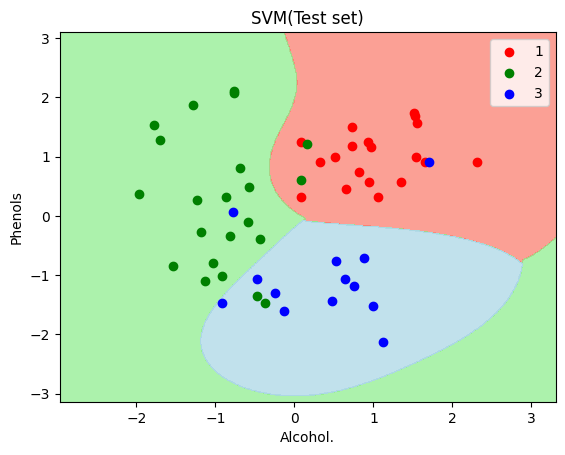

In [14]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = 
                               X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = 
                               X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    plt.title('SVM(Test set)')
    plt.xlabel('Alcohol.')
    plt.ylabel('Phenols')
    plt.legend()
    plt.show

### KERNEL = linear

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [16]:
y_pred = classifier.predict(X_train)

In [17]:
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[38  2  0]
 [ 4 38  7]
 [ 1  5 29]]


0.8467741935483871

#### Model jest dopasowany

In [18]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[19  0  0]
 [ 4 16  2]
 [ 1  1 11]]


0.8518518518518519

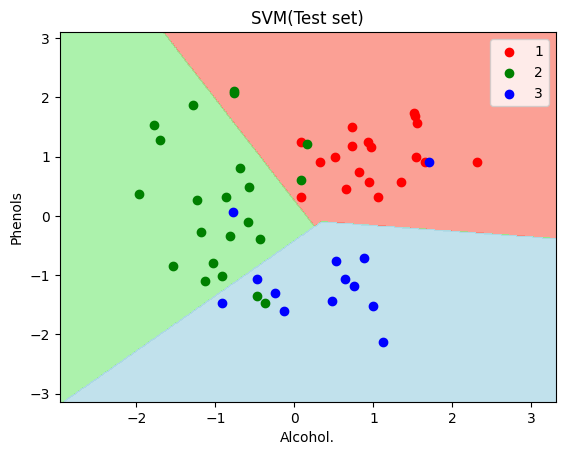

In [19]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = 
                               X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = 
                               X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    plt.title('SVM(Test set)')
    plt.xlabel('Alcohol.')
    plt.ylabel('Phenols')
    plt.legend()
    plt.show

### KERNEL = poly

In [20]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [21]:
y_pred = classifier.predict(X_train)

In [22]:
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[28 12  0]
 [ 2 42  5]
 [ 0 11 24]]


0.7580645161290323

#### Model jest dopasowany, ale tym razem dokładność dla zbioru testowego jest niższa, niż z użyciem pozostałych kernelów. 
##### Tutaj dokładność zgadza się z rozpiską gdzie test < train 
##### w pozostałych jest odwrotnie

In [23]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  4  0]
 [ 0 20  2]
 [ 1  1 11]]


0.8518518518518519

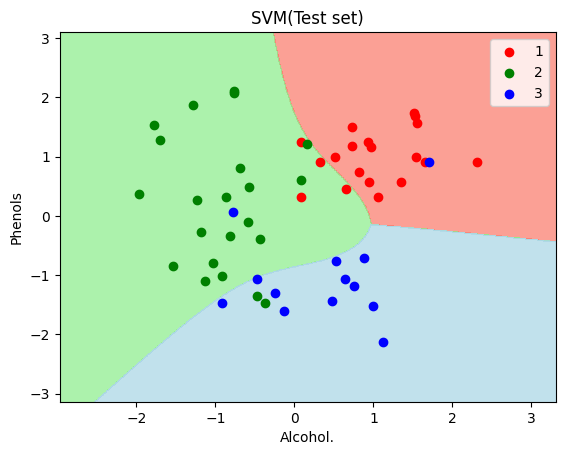

In [24]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = 
                               X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = 
                               X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    plt.title('SVM(Test set)')
    plt.xlabel('Alcohol.')
    plt.ylabel('Phenols')
    plt.legend()
    plt.show

### KERNEL = sigmoid

In [25]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [26]:
y_pred = classifier.predict(X_train)

In [27]:
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[37  3  0]
 [ 3 36 10]
 [ 1  4 30]]


0.8306451612903226

#### Model jest dopasowany ale ma niższą dokładność niż z użyciem kernela linear i rbf

In [28]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[18  1  0]
 [ 6 14  2]
 [ 1  1 11]]


0.7962962962962963

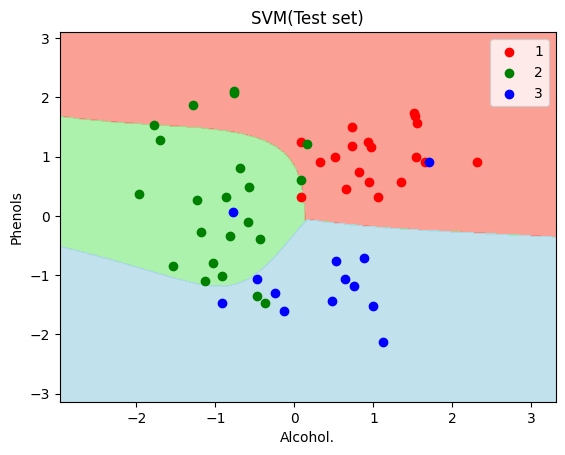

In [29]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = 
                               X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = 
                               X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    plt.title('SVM(Test set)')
    plt.xlabel('Alcohol.')
    plt.ylabel('Phenols')
    plt.legend()
    plt.show